In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
import os

In [2]:
df=pd.read_csv("./data/Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.shape

(2200, 8)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
La=LabelEncoder()

In [9]:
df_new=La.fit_transform(df['label'])

In [10]:
df['Label_encoded_data']=df_new

In [11]:
df.Label_encoded_data.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [12]:
df.drop('label',axis=1)

,N,P,K,temperature,humidity,ph,rainfall,Label_encoded_data
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


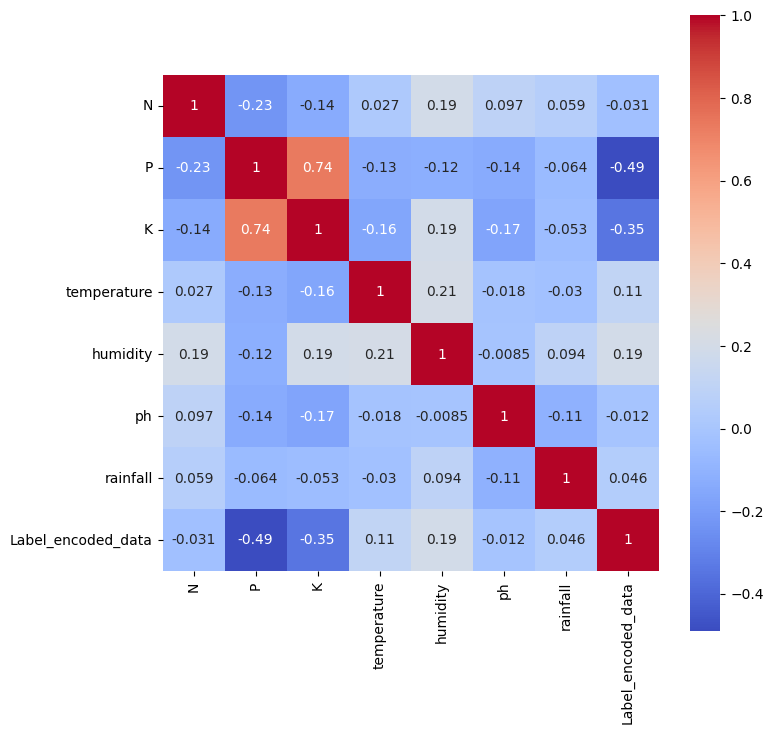

In [13]:
corr_matrix = df.drop('label', axis=1).corr()
plt.figure(figsize=(8,8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

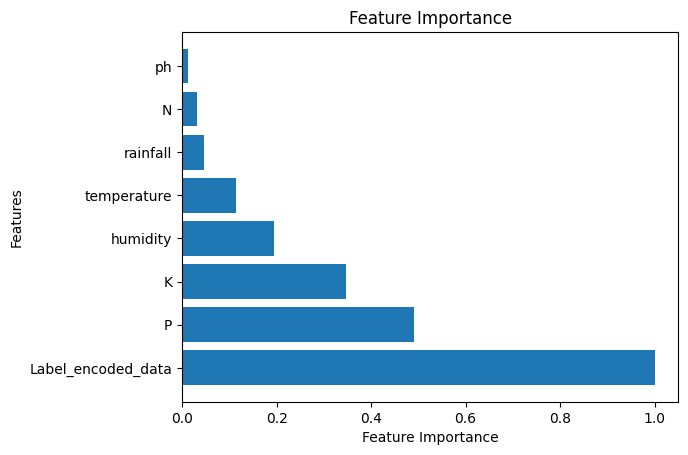

In [14]:
import matplotlib.pyplot as plt

feature_importance = corr_matrix['Label_encoded_data'].abs().sort_values(ascending=False)
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x=df.drop(['Label_encoded_data','label'],axis=1)
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,Label_encoded_data
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


Accuracy: 99.31818181818181
Training Accuracy: 1.0000
Test Accuracy: 0.9932
The model might be overfitting.


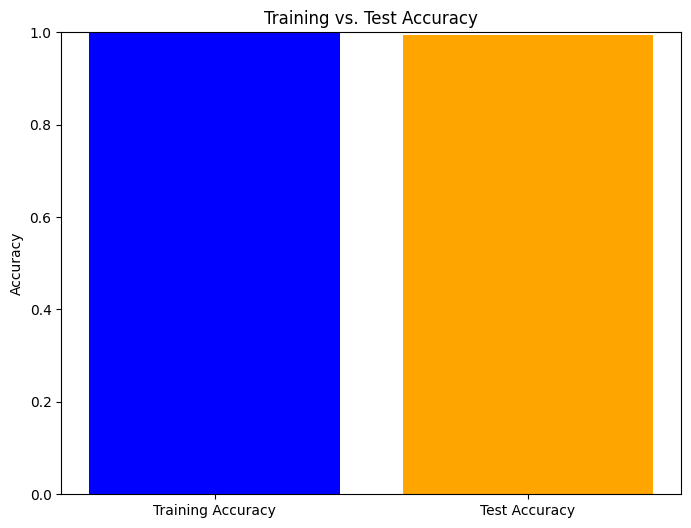

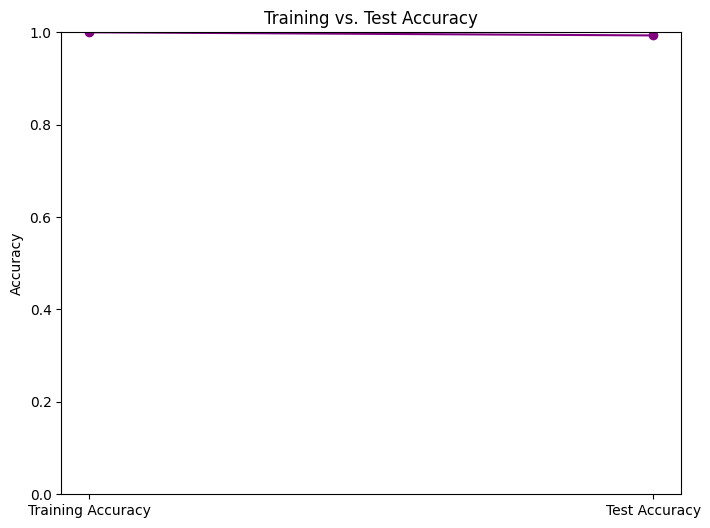

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create a Logistic Regression classifier
RF = RandomForestClassifier()

# Train the classifier
RF.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = RF.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)


from sklearn.metrics import accuracy_score

# Assuming you have a trained model, e.g., model = SomeModel().fit(x_train, y_train)
# Replace SomeModel with your actual model (e.g., LogisticRegression, RandomForestClassifier, etc.)


# Predictions on the training set
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predictions on the test set
y_test_pred = RF.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Displaying the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("The model might be underfitting.")
else:
    print("The model is performing well with no clear signs of overfitting.")


accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set the y-axis range to [0, 1] for clarity
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy')
plt.show()

# Alternatively, if you want to use a line plot
plt.figure(figsize=(8, 6))
plt.plot(labels, accuracies, marker='o', linestyle='-', color='purple')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy')
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
clf = GaussianNB()

# Train the classifier
clf.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(x_test)

#Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 99.54545454545455


In [19]:
from sklearn.metrics import accuracy_score

# Assuming you have a trained model, e.g., model = SomeModel().fit(x_train, y_train)
# Replace SomeModel with your actual model (e.g., LogisticRegression, RandomForestClassifier, etc.)


# Predictions on the training set
y_train_pred = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predictions on the test set
y_test_pred = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Displaying the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("The model might be underfitting.")
else:
    print("The model is performing well with no clear signs of overfitting.")


Training Accuracy: 0.9949
Test Accuracy: 0.9955
The model might be underfitting.


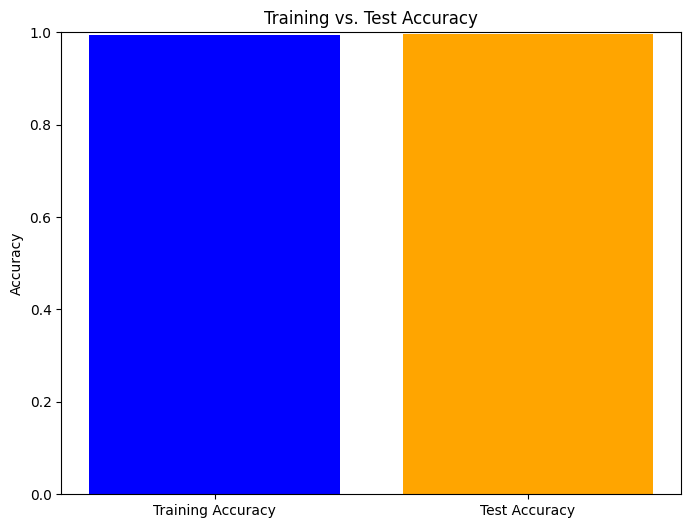

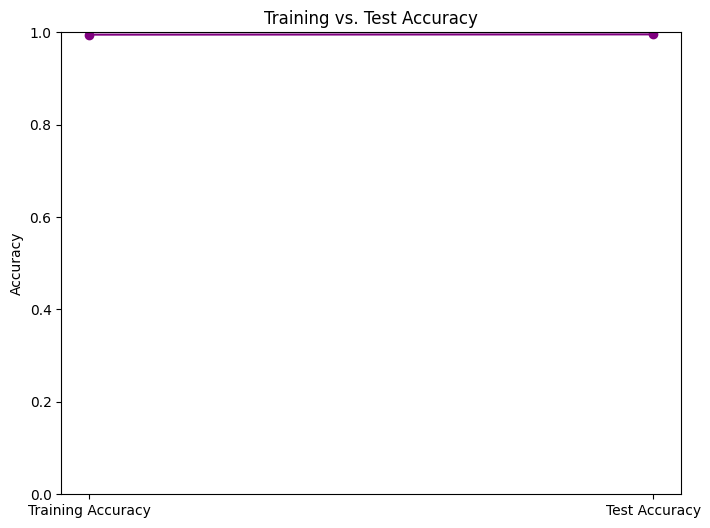

In [20]:
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set the y-axis range to [0, 1] for clarity
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy')
plt.show()

# Alternatively, if you want to use a line plot
plt.figure(figsize=(8, 6))
plt.plot(labels, accuracies, marker='o', linestyle='-', color='purple')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy')
plt.show()

In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
    

In [22]:
y_pred = RF.predict([[90	,42,	43,	20.879744	,82.002744,6.502985	,202.935536	]])
y_pred

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([20])

In [23]:
# assa dictionary banav o/p sathi
#if statement tak 
#function jo lihilay to pickle kar 
#prediction ha ahe ki which crop should be grown 

class_label = {
    "20": 'rice', "11":'maize', "3": 'chickpea',
    "9": 'kidneybeans', "18": 'pigeonpeas', "13":'mothbeans',
    "14":'mungbean', "2": 'blackgram', "10": 'lentil',
    "19": 'pomegranate', "1": 'banana', "12":'mango',
    "7": 'grapes', "21": 'watermelon', "15":'muskmelon',
    "0": 'apple', "16": 'orange', "17": 'papaya',
    "4": 'coconut', "6": 'cotton', "8": 'jute', "5": 'coffee'
}


In [24]:
# Create the 'model' directory if it doesn't exist
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)


In [25]:
# Path to save the model
model_path = os.path.join(model_dir, 'crop_disease_prediction_model_using_numeric_values.pkl')

In [26]:
# Dump the model to the specified path
with open(model_path, 'wb') as model_file:
    pickle.dump(RF, model_file)